In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

In [2]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [3]:
#Check attributes for a node:
for edge in G.edges(data=True):
    print(edge)
    break

('Evelyn Jefferson', 'E1', {})


In [4]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [5]:
# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = nx.bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


In [6]:
#Check attributes for a node:
for node in G.nodes(data=True):
    print(node)
    break

('Evelyn Jefferson', {'bipartite': 0})


### Node Degrees
Number of connections to other nodes in the projected womens network. Important because it can give high level insight into power, influence, or bottle necks.

In [7]:
# Calculate the degree of each node
node_degrees = dict(W.degree())

# Sort nodes by their degrees in descending order
sorted_nodes = sorted(node_degrees.items(), key=lambda x: x[1], reverse=True)

# Print the nodes and their corresponding degrees in descending order
for node, degree in sorted_nodes:
    print(f"Node {node}: Degree {degree}")

Node Evelyn Jefferson: Degree 17
Node Theresa Anderson: Degree 17
Node Ruth DeSand: Degree 17
Node Verne Sanderson: Degree 17
Node Sylvia Avondale: Degree 17
Node Nora Fayette: Degree 17
Node Helen Lloyd: Degree 17
Node Pearl Oglethorpe: Degree 16
Node Myra Liddel: Degree 16
Node Katherina Rogers: Degree 16
Node Dorothy Murchison: Degree 16
Node Laura Mandeville: Degree 15
Node Brenda Rogers: Degree 15
Node Frances Anderson: Degree 15
Node Eleanor Nye: Degree 15
Node Olivia Carleton: Degree 12
Node Flora Price: Degree 12
Node Charlotte McDowd: Degree 11


# Plot the Network
The network can be plotted as a whole but that won't reveal much information. A more detailed approach can be done by leveraging dimensions. That is, use color to distinguish by bipartite. Weights can also be used to set the size of the nodes, in this case that will be node degrees.

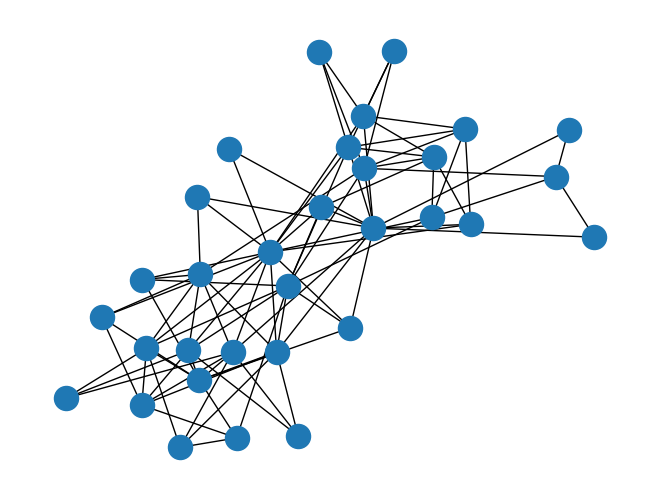

In [8]:
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos, label=True)
plt.show()

### Plot in spring layout with added visualization dimensions

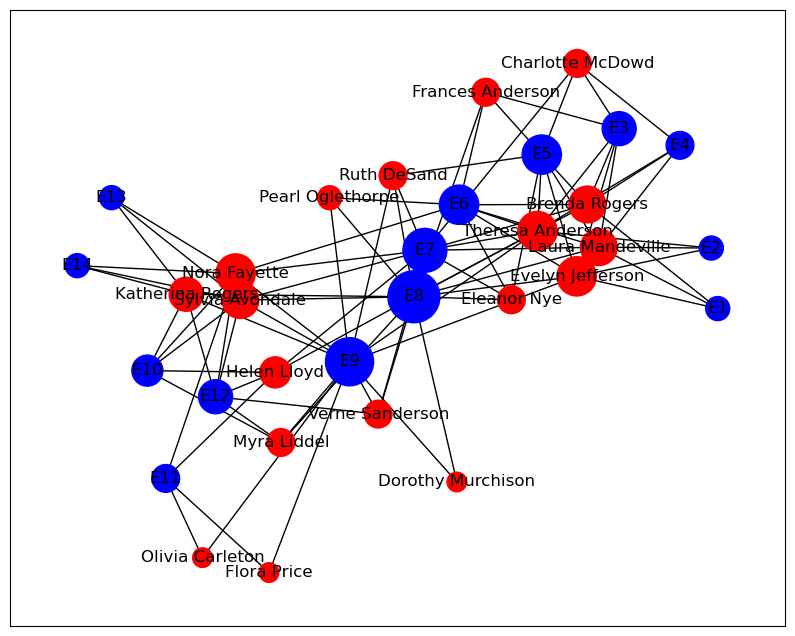

In [9]:
# Calculate the degree of each node
node_degrees = dict(G.degree())

# Define colors for each bipartite category
colors = ['red' if G.nodes[node]['bipartite'] == 0 else 'blue' for node in G.nodes()]

# Define node sizes based on their degrees
sizes = [node_degrees[node] * 100 for node in G.nodes()]

# Create a layout
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))

# Plot nodes
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=sizes)

# Plot edges
nx.draw_networkx_edges(G, pos)

# Plot labels
nx.draw_networkx_labels(G, pos)

# Show the plot
plt.show()

### Plot in bipartite layout
Several women seem to be high participants in the clubs. These include Nora Fayette, Sylvia Avodalo, Katherina Rogers, Brenda Rogers, Theresa Anderson, Laura Mandeville, and Evelyn Jefferson. The top clubs are E9, E8, and E7 which could be seen as sub networks or core components of the network.

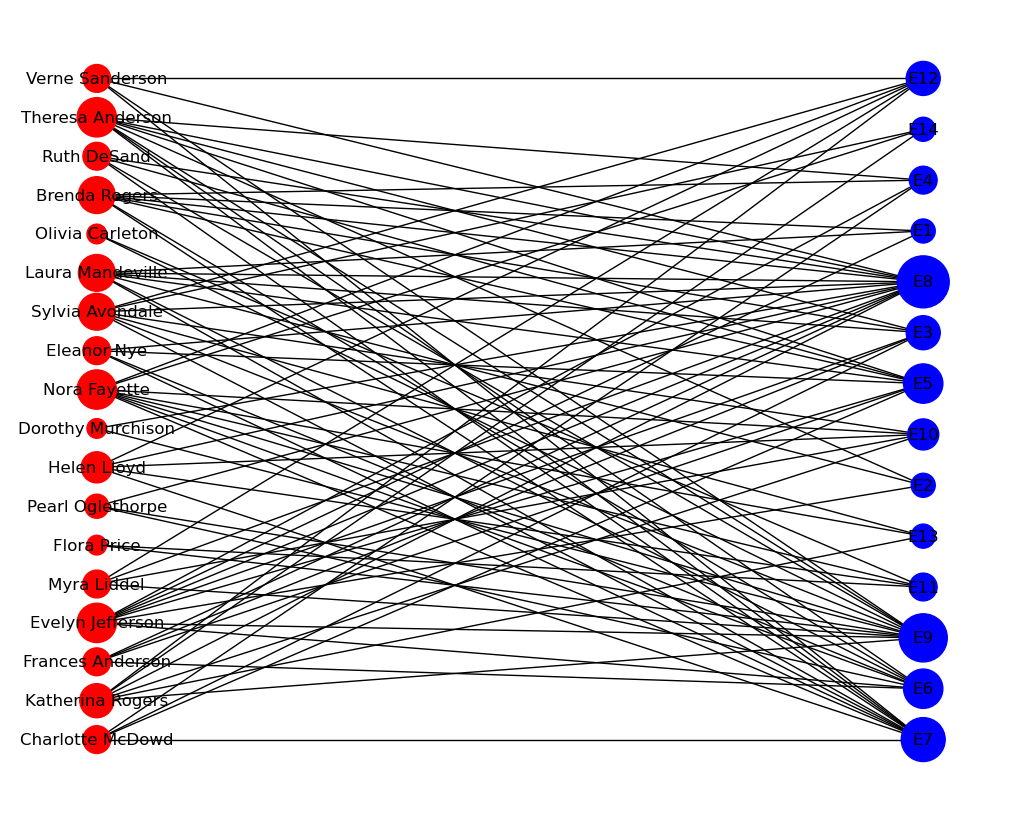

In [10]:
# Create the bipartite layout
plt.figure(figsize=(10, 8))
pos = nx.bipartite_layout(G, women)

# Draw the bipartite graph
nx.draw(G, pos=pos, with_labels=True,node_color=colors, node_size=sizes)

# Show the plot
plt.show()

### Examining Subgraphs in the network
A weight of '3' is used to divide the network into its largest components

In [11]:
#Check for subgraphs using the Island Method
#Initialize functions to trim and 'islandize' components
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        #print(f, to, edata, " ", type(edata), edata['weight'])
        #print(edata)
        if edata['weight'] > weight:
            g2.add_edge(f,to,**edata)
    return g2

def island_method(g, iterations=5):
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    #print(weights)
    mn= int(min(weights))
    mx= int(max(weights))
    step= int((mx-mn)/iterations)
    return [[threshold,trim_edges(g,threshold)] for threshold in range(mn,mx,step)]

In [12]:
islands = island_method(W)

for i in islands:
    #print("Threshold - ", "# Nodes -", "# Islands")
    print("Threshold - ",i[0], "# Nodes -",len(i[1]), "# Islands -", len([len(c) for c in nx.connected_components(i[1])]))

Threshold -  1 # Nodes - 18 # Islands - 1
Threshold -  2 # Nodes - 15 # Islands - 1
Threshold -  3 # Nodes - 14 # Islands - 2
Threshold -  4 # Nodes - 7 # Islands - 2
Threshold -  5 # Nodes - 7 # Islands - 2
Threshold -  6 # Nodes - 2 # Islands - 1


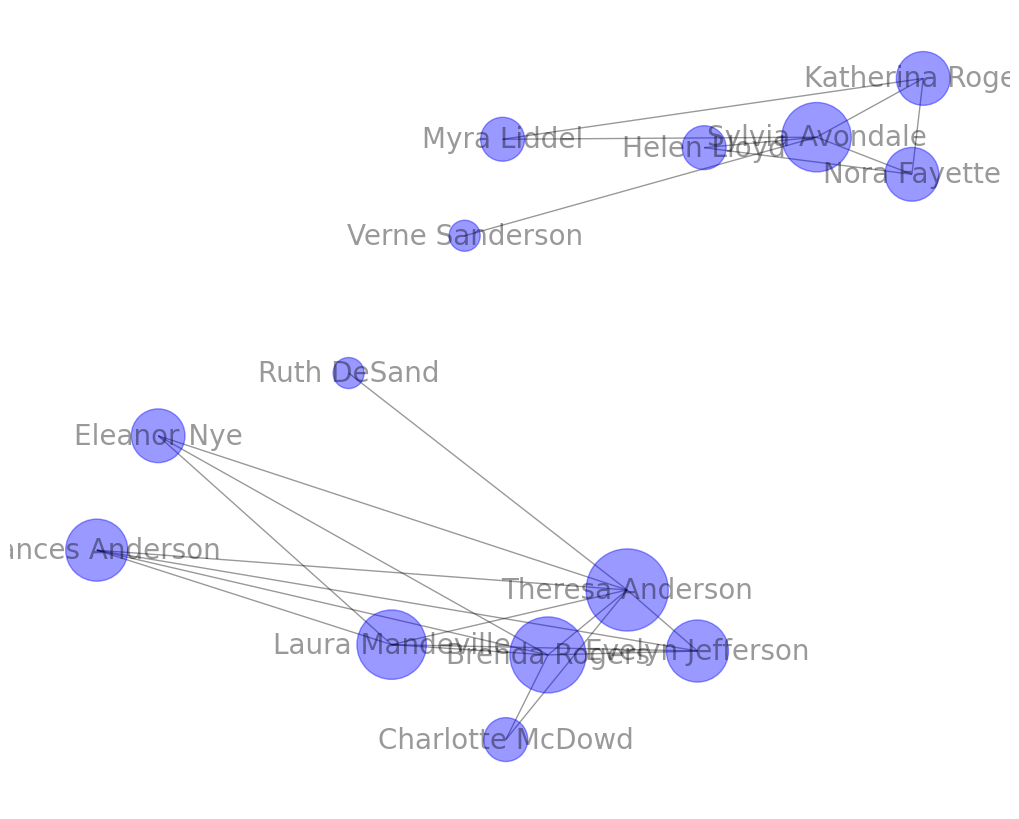

In [13]:
#Plot subgraphs based on islands
w3 = trim_edges(W, 3)
w3_deg = w3.degree()

# Calculate the degree of each node
node_degrees = dict(w3.degree())
sizes = [node_degrees[node] * 100 for node in w3.nodes()]

#plot
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(w3, pos=pos, node_size=[v*500 for v in node_degrees.values()], with_labels=True, node_color='b', alpha=.4, font_size=20)

### Women who possibly maintain structural holes (Brokers)
Structural holes (aka spanners) are created by nodes that connect subgraphs. For example, a person that overlaps at an event and through mutuality may connect works. In this network, Dorothy, Pearl, Olivia, and Flora all serve as spanners.

In [14]:
spanners = list(dict(set(W.degree(women))).keys() - dict(set(w3.degree(women))).keys())
print(spanners)

['Pearl Oglethorpe', 'Flora Price', 'Dorothy Murchison', 'Olivia Carleton']


### Betweenness Centrality
Determines if certain nodes potentially serve as 'bottle necks' to connect other nodes. Many times they serve as a broker to exert control or influence over information in a network. This is because their position can be strategic and positioned on the shortest path. In this network, many women share the same score which leads to believe that they are in fact a close knit group. Consequently, even if some women decide not to attend certain future events, the network will still persist.

As expected, given that Olivia and Flora were trimmed with the islands method, they also have low betweenness centrality.

In [15]:
bet_cen = nx.betweenness_centrality(W)
sorted_bet_cen = {k: v for k, v in sorted(bet_cen.items(), key=lambda item: item[1], reverse=True)}
sorted_bet_cen

{'Evelyn Jefferson': 0.010122230710466005,
 'Theresa Anderson': 0.010122230710466005,
 'Ruth DeSand': 0.010122230710466005,
 'Verne Sanderson': 0.010122230710466005,
 'Sylvia Avondale': 0.010122230710466005,
 'Nora Fayette': 0.010122230710466005,
 'Helen Lloyd': 0.010122230710466005,
 'Pearl Oglethorpe': 0.0053475935828877,
 'Myra Liddel': 0.0053475935828877,
 'Katherina Rogers': 0.0053475935828877,
 'Dorothy Murchison': 0.0053475935828877,
 'Laura Mandeville': 0.0026737967914438505,
 'Brenda Rogers': 0.0026737967914438505,
 'Frances Anderson': 0.0026737967914438505,
 'Eleanor Nye': 0.0026737967914438505,
 'Charlotte McDowd': 0.0,
 'Olivia Carleton': 0.0,
 'Flora Price': 0.0}

### Clustering Coefficients
All women show a similar clustering coefficient, demonstrating that they are closely knit. In other words, friends are also friends with each other.

In [16]:
w_clust_coefs = bipartite.clustering(G, women)
sorted_w_clust_coefs = {k: v for k, v in sorted(w_clust_coefs.items(), key=lambda item: item[1], reverse=True)}
sorted_w_clust_coefs

{'Theresa Anderson': 0.3718188674071026,
 'Brenda Rogers': 0.36491249491249494,
 'Ruth DeSand': 0.36435574229691875,
 'Eleanor Nye': 0.36031746031746026,
 'Laura Mandeville': 0.35181725681725684,
 'Verne Sanderson': 0.34883286647992534,
 'Pearl Oglethorpe': 0.3323412698412699,
 'Myra Liddel': 0.32440476190476186,
 'Sylvia Avondale': 0.32275192128133307,
 'Evelyn Jefferson': 0.3179433311786253,
 'Frances Anderson': 0.31481721981721983,
 'Dorothy Murchison': 0.3050099206349206,
 'Katherina Rogers': 0.2974950396825397,
 'Charlotte McDowd': 0.29441164895710353,
 'Helen Lloyd': 0.2616989219930397,
 'Nora Fayette': 0.2605766782237371,
 'Olivia Carleton': 0.2575066137566138,
 'Flora Price': 0.25750661375661377}

### Triangles
Women with the highest betweenness centrality also have the most triangles.

In [17]:
triangles = nx.triangles(W)
sorted_triangles = {k: v for k, v in sorted(triangles.items(), key=lambda item: item[1], reverse=True)}
sorted_triangles

{'Evelyn Jefferson': 122,
 'Theresa Anderson': 122,
 'Ruth DeSand': 122,
 'Verne Sanderson': 122,
 'Sylvia Avondale': 122,
 'Nora Fayette': 122,
 'Helen Lloyd': 122,
 'Pearl Oglethorpe': 112,
 'Myra Liddel': 112,
 'Katherina Rogers': 112,
 'Dorothy Murchison': 112,
 'Laura Mandeville': 101,
 'Brenda Rogers': 101,
 'Frances Anderson': 101,
 'Eleanor Nye': 101,
 'Olivia Carleton': 66,
 'Flora Price': 66,
 'Charlotte McDowd': 55}

# II - Project Bipartite Graph Onto Event Nodes
Created a single node graph for Event nodes. The weights are calculated by the number of women who attend the event.

In [18]:
E = nx.bipartite.weighted_projected_graph(G, clubs)

In [19]:
# Calculate the degree of each node
node_degrees = dict(E.degree())

# Sort nodes by their degrees in descending order
sorted_nodes = sorted(node_degrees.items(), key=lambda x: x[1], reverse=True)

# Print the nodes and their corresponding degrees in descending order
for node, degree in sorted_nodes:
    print(f"Node {node}: Degree {degree}")

Node E6: Degree 13
Node E7: Degree 13
Node E8: Degree 13
Node E9: Degree 13
Node E1: Degree 8
Node E2: Degree 8
Node E3: Degree 8
Node E4: Degree 8
Node E5: Degree 8
Node E10: Degree 8
Node E11: Degree 8
Node E12: Degree 8
Node E13: Degree 8
Node E14: Degree 8


As revealed prior, in the bipartite plot, Events E6-E9 have the most women in attendence. 

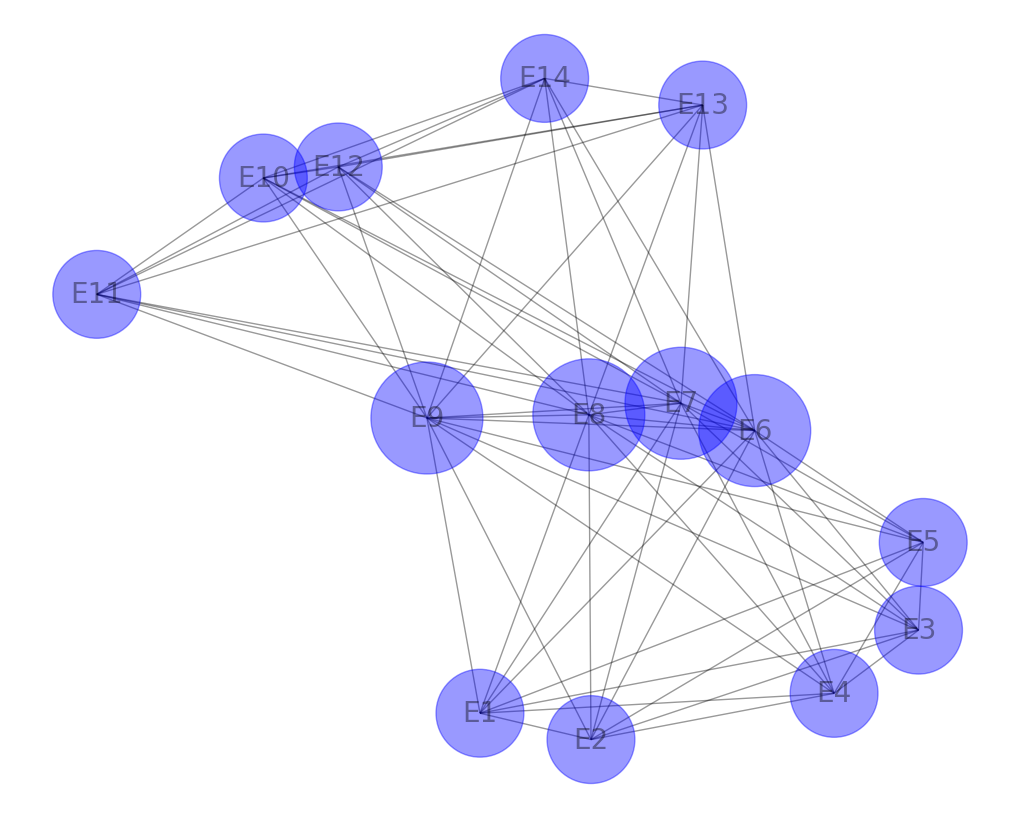

In [20]:
#plot
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(E, pos=pos, node_size=[v*500 for v in node_degrees.values()], with_labels=True, node_color='b', alpha=.4, font_size=20)

All events were found to be well connected due to multiple women being in attendance.

In [61]:
islands_E = island_method(E)

for i in islands_E:
    #print("Threshold - ", "# Nodes -", "# Islands")
    print("Threshold - ",i[0], "# Nodes -",len(i[1]), "# Islands -", len([len(c) for c in nx.connected_components(i[1])]))

Threshold -  1 # Nodes - 14 # Islands - 1
Threshold -  2 # Nodes - 14 # Islands - 1
Threshold -  3 # Nodes - 9 # Islands - 1
Threshold -  4 # Nodes - 8 # Islands - 1
Threshold -  5 # Nodes - 6 # Islands - 1
Threshold -  6 # Nodes - 5 # Islands - 1
Threshold -  7 # Nodes - 3 # Islands - 1
Threshold -  8 # Nodes - 2 # Islands - 1


The arc plot reveals that 4 event nodes have the most connections. Even without labels, we can guess that these are events E6 through E9.

<Axes: >

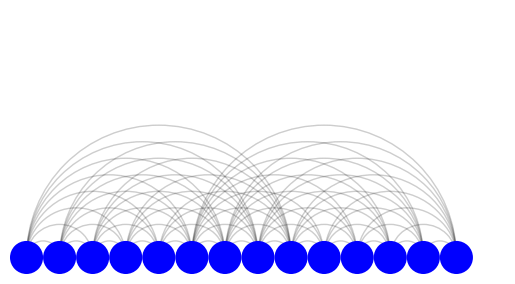

In [68]:
#Plot arc
import nxviz as nv 
from nxviz import annotate, plots

nv.arc(E)